In [1]:
using Plots, PlotRecipes, LaTeXStrings
pyplot()

    +(AbstractArray, DataArrays.DataArray) at /Users/claudiopierard/.julia/v0.4/DataArrays/src/operators.jl:276
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /Users/claudiopierard/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.DataArray{T<:Any, 2})
before the new definition.
    +(AbstractArray, DataArrays.AbstractDataArray) at /Users/claudiopierard/.julia/v0.4/DataArrays/src/operators.jl:300
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /Users/claudiopierard/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.AbstractDataArray{T<:Any, 2})
before the new definition.


Plots.PyPlotBackend()

In [2]:
include("nonlineal_analysis.jl")

nonlineal_analyisi.jl


In [3]:
list()

 bifurcation(x0, n, range_r, k)
 cobweb_plot!(f::Function, x0, rangex, n)
 cobweb_plot(f::Function, x0, rangex, n)
 iterator(f::Function, n::Int, x0)
 logistic_iterator(x0, r, n)
 logistic_equation(x0, r)
 plot_rate(f::Function, xi, xf, interval)
 runge_kutta(f::Function, n, x0, dt)
 improved_euler(f::Function, n, x0, dt)
 simple_euler(f::Function, n, x0, dt)


# Bifurcation Diagram

Write a program to construct a bifurcation diagram for the logistic map.  (Hint: this should be a loop that calls your logistic map program from Unit 1.3.)  Your program should take the following arguments:

In [4]:
f(x) = logistic_equation(0.9, 3)

f (generic function with 1 method)

In [5]:
ns, xn = logistic_iterator(.9, 3, 10)

11-element Array{Any,1}:
 0.9     
 0.27    
 0.5913  
 0.724993
 0.598135
 0.721109
 0.603333
 0.717967
 0.607471
 0.71535 
 0.610873

##### First try!

In [6]:
r_range, orb_1 = bifurcation(0.9, 40, 0.01:1/32:4, 10)

([0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01  …  3.97875,3.97875,3.97875,3.97875,3.97875,3.97875,3.97875,3.97875,3.97875,3.97875],[8.99182e-22,8.99182e-24,8.99182e-26,8.99182e-28,8.99182e-30,8.99182e-32,8.99182e-34,8.99182e-36,8.99182e-38,8.99182e-40  …  0.837623,0.541152,0.98795,0.0473676,0.179537,0.586083,0.965204,0.133627,0.460624,0.988519])

[Plots.jl] Initializing backend: pyplot



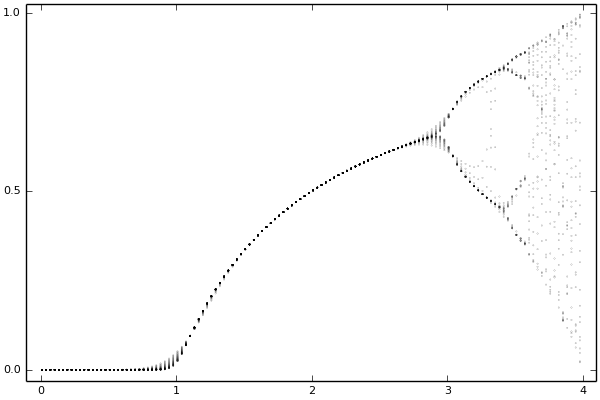

In [8]:
scatter(r_range,orb_1, markersize=0.1, c=:black, leg=false, grid=false)

#### Question 2
Check your program by constructing a bifurcation plot for $r\ \epsilon \ [2.4,4]$ with a step size of 0.01.  For each r, construct a 1000-iterate trajectory from x0 = 0.2, and discard the first five points -- i.e., plot x5 to x1000 for each r.  The overall structure will look similar to that of Figure 1 below (although not quite identical; we'll get to that later in this quiz).

![question1](https://www.complexityexplorer.org/ckeditor_assets/pictures/403/content_feigenbaum.png)


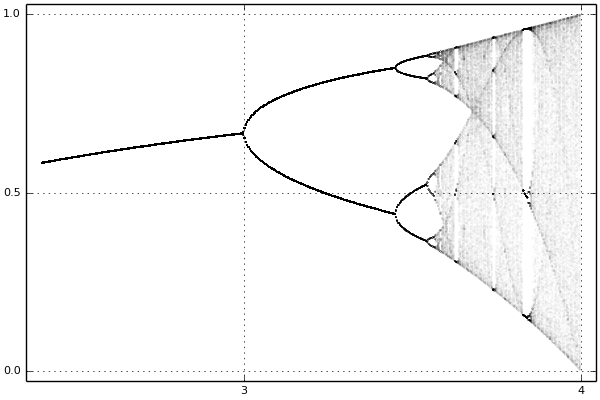

In [11]:
r_range, orb_1 = bifurcation(0.2, 1000, 2.4:1/256:4, 500)
scatter(r_range,orb_1, markersize=0.01, c=:black, leg=false, grid=true)

It looks fuzzier than the plot from the exercise.

----------------------------------------

#### Question 3
Using your tool, construct a bifurcation diagram with $r\ \in \ [2.8,3.6] $ with rstep = 0.01.  Start each orbit from x0 = 0.2 and plot x500 to x1000 for each r.


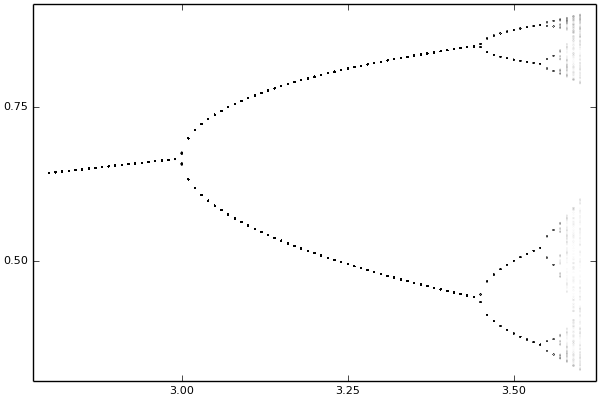

In [103]:
r_range, orb_1 = bifurcation(0.2, 1000, 2.8:0.01:3.6, 500)
scatter(r_range,orb_1, markersize=0.01, c=:black, leg=false, grid=false)

In [12]:
function iterator_parameter(f::Function, n::Int, x0, r)

    solution = Float64[x0]
    #steps = Int[0]
    x_old = x0
    for i in 1:n

        x_new = f(solution[i], r)
        push!(solution, x_new)
        #push!(steps, i)

    end

    return solution

end

iterator_parameter (generic function with 1 method)

In [13]:
"""
    bifurcation(x0, n, range_r, k)
    OUT: r_parameters, orbits

Constructs the array to plot the bifurcation plot of the logistic equation. `x0` is the initial condition, `n` is
the number of iterates for the `logistic_iterator`function, the `range_r` is the range of the r parameter of the 
logistic equation, k is the number of steps that we want to remove from the transient.

"""

function bifurcation_any(F::Function, x0, n, range_r, k)
    
    orbit = Float64[]
    r_par = Float64[]
    
    for r in range_r
        
        solution = iterator_parameter(F, n::Int, x0, r)
        
        deleteat!(solution, 1:k) #Remove the transient.
        rs = similar(solution)
        
        for i in 1:length(solution)
            
            rs[i] = r
            
        end
        
        append!(orbit, solution)
        append!(r_par, rs)
        
    end
    
    return r_par, orbit
    
end

bifurcation_any (generic function with 1 method)

In [14]:
function ejercicio_1(x, r)
    
    f = x^2 + r
    
end

ejercicio_1 (generic function with 1 method)

In [21]:
2^8

256

In [42]:
ces, orbit = bifurcation_any(ejercicio_1, 0.4, 1000, -1.41:1/2^12:-1.39, 500)

([-1.41,-1.41,-1.41,-1.41,-1.41,-1.41,-1.41,-1.41,-1.41,-1.41  …  -1.39022,-1.39022,-1.39022,-1.39022,-1.39022,-1.39022,-1.39022,-1.39022,-1.39022,-1.39022],[0.531777,-1.12721,-0.13939,-1.39057,0.523686,-1.13575,-0.120065,-1.39558,0.537656,-1.12093  …  -1.38964,0.540862,-1.09769,-0.185294,-1.35589,0.448215,-1.18933,0.024276,-1.38964,0.540862])


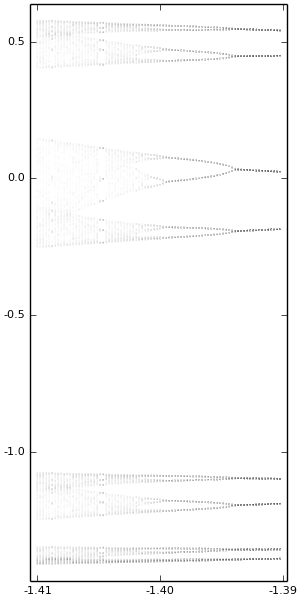

In [43]:
scatter(ces, orbit, c=:black, leg=false, grid=false, markersize=0.005, size=(300,600))